In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
data_url = "India_Statewise_Fuel_Data_Updated_1950_2050 final.csv"
data = pd.read_csv(data_url)

In [ ]:
print("Basic Information about the Dataset:")
data.info()
print("\nPreview of the Dataset:")
print(data.head())

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8484 entries, 0 to 8483
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   State                              8484 non-null   object 
 1   Year                               8484 non-null   int64  
 2   Fuel_Consumption (Million Liters)  8484 non-null   float64
 3   Income (Crore INR)                 8484 non-null   float64
 4   Fuel_Price (INR per Liter)         8484 non-null   float64
 5   Population                         8484 non-null   int64  
 6   Vehicle_Type                       8484 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 464.1+ KB

Preview of the Dataset:
            State  Year  Fuel_Consumption (Million Liters)  \
0  Andhra Pradesh  1950                              75.24   
1  Andhra Pradesh  1950                              19.78   
2  And

In [ ]:
print("\nMissing Values per Column:")
print(data.isnull().sum())


Missing Values per Column:
State                                0
Year                                 0
Fuel_Consumption (Million Liters)    0
Income (Crore INR)                   0
Fuel_Price (INR per Liter)           0
Population                           0
Vehicle_Type                         0
dtype: int64


In [ ]:
#Data Preprocessing
data['Year'] = data['Year'].astype(int)
data['Fuel_Consumption (Million Liters)'] = data['Fuel_Consumption (Million Liters)'].astype(float)
data['Fuel_Price (INR per Liter)'] = data['Fuel_Price (INR per Liter)'].astype(float)
data = pd.get_dummies(data, columns=['State', 'Vehicle_Type'], drop_first=True)


Visualizing Fuel Consumption Trends Over Time:


<ipython-input-8-82a5fc669b0e>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Year', y='Fuel_Consumption (Million Liters)', ci=None)


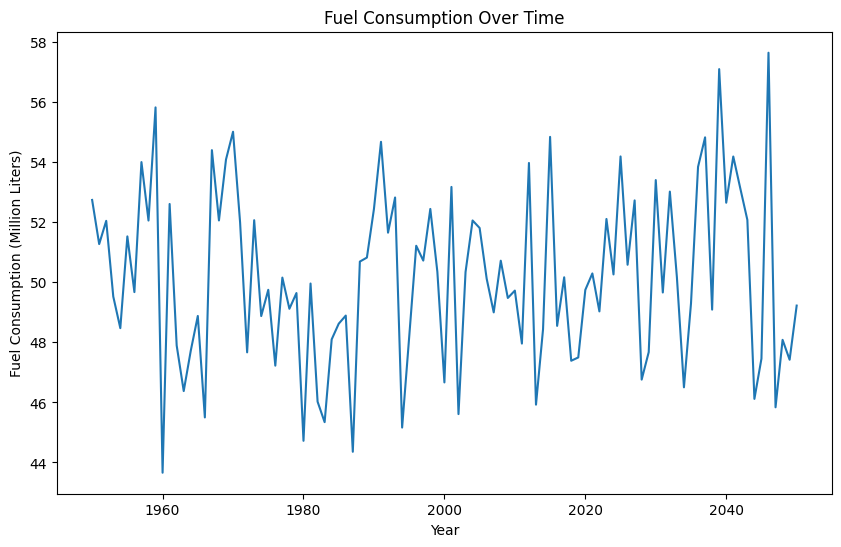

In [ ]:
# Plot fuel consumption trends over years
print("\nVisualizing Fuel Consumption Trends Over Time:")
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Year', y='Fuel_Consumption (Million Liters)', ci=None)
plt.title("Fuel Consumption Over Time")
plt.xlabel("Year")
plt.ylabel("Fuel Consumption (Million Liters)")
plt.show()


Correlation Heatmap:


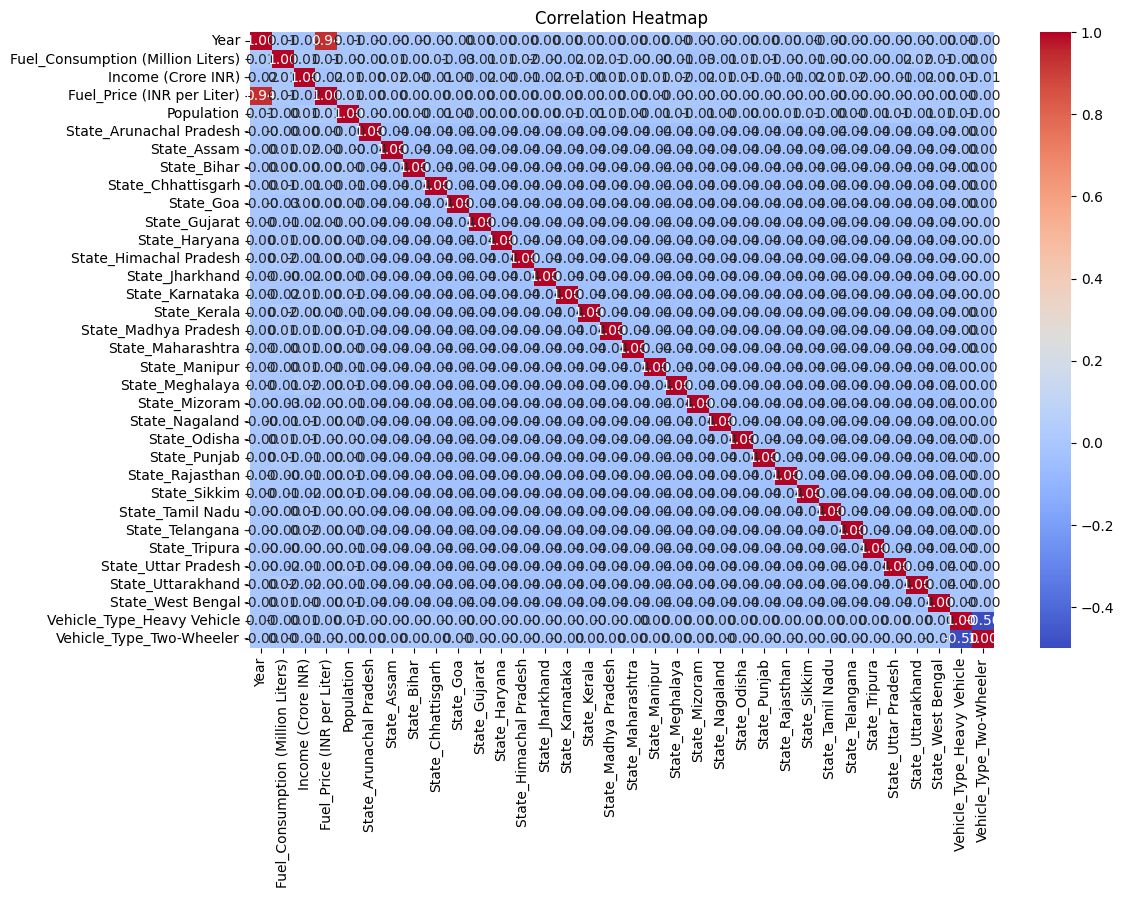

In [ ]:
# Plot correlation heatmap
print("\nCorrelation Heatmap:")
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
X = data.drop(['Fuel_Consumption (Million Liters)'], axis=1)
y = data['Fuel_Consumption (Million Liters)']

# Split the data into training and testing sets
print("\nSplitting Data into Training and Testing Sets:")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Splitting Data into Training and Testing Sets:
Training Set Size: (6787, 33)
Testing Set Size: (1697, 33)


In [ ]:
# Initialize the Random Forest Regressor
print("\nTraining the Random Forest Regressor:")
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model Training Complete.")


Training the Random Forest Regressor:
Model Training Complete.


In [ ]:
# Make predictions on the test set
print("\nEvaluating the Model:")
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Evaluating the Model:
Mean Absolute Error (MAE): 25.599186505598112
R-squared (R2): -0.0739617383724378


In [ ]:
#  Define Prediction Function
def predict_fuel(state, year, vehicle_type):
    # Create a dictionary for prediction
    input_data = {
        'Year': [year],
        'Income (Crore INR)': [X['Income (Crore INR)'].mean()],  # Using mean income for prediction
        'Fuel_Price (INR per Liter)': [X['Fuel_Price (INR per Liter)'].mean()],  # Using mean fuel price
        'Population': [X['Population'].mean()]  # Using mean population
    }

    # Add state and vehicle type columns
    for col in X.columns:
        if col.startswith('State_'):
            input_data[col] = [1 if f'State_{state}' == col else 0]
        elif col.startswith('Vehicle_Type_'):
            input_data[col] = [1 if f'Vehicle_Type_{vehicle_type}' == col else 0]

    # Convert dictionary to DataFrame
    input_df = pd.DataFrame(input_data)

    # Ensure all columns in the model are present in input_df
    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0

    # Predict fuel consumption
    prediction = model.predict(input_df)[0]

    # Print and visualize the result
    print(f"\nPredicted Fuel Consumption for {state} in {year} for {vehicle_type}: {prediction:.2f} Million Liters")

    plt.bar([f'{state} - {year} ({vehicle_type})'], [prediction], color='skyblue')
    plt.title("Predicted Fuel Consumption")
    plt.ylabel("Fuel Consumption (Million Liters)")
    plt.show()